In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from operator import itemgetter
from sklearn.model_selection import cross_val_score

In [51]:
all_NBA_2018_19 = pd.read_csv('Documents/AI_PROJECT/ALL-NBA-2018-19.csv')
non_all_NBA_2018_19 = pd.read_csv('Documents/AI_PROJECT/Non-ALL-NBA-2018-19.csv')

In [47]:
all_NBA_2018_19.head()

,Rk,Player,Season,Age,Tm,Lg,WS,VORP,BPM,G,...,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,ALL-NBA
0,1,James Harden\hardeja01,2018-19,29,HOU,NBA,15.2,9.9,11.7,78,...,5.0,3.1,36.1,0.442,0.528,0.368,0.541,0.879,0.616,1
1,2,Giannis Antetokounmpo\antetgi01,2018-19,24,MIL,NBA,14.4,7.6,10.8,72,...,3.7,3.2,27.7,0.578,0.641,0.256,0.599,0.729,0.644,1
2,3,Rudy Gobert\goberru01,2018-19,26,UTA,NBA,14.4,5.9,7.0,81,...,1.6,2.9,15.9,0.669,0.669,NaN,0.669,0.636,0.682,1
3,4,Damian Lillard\lillada01,2018-19,28,POR,NBA,12.1,5.4,5.5,80,...,2.7,1.9,25.8,0.444,0.499,0.369,0.522,0.912,0.588,1
4,5,Paul George\georgpa01,2018-19,28,OKC,NBA,11.9,5.3,5.5,77,...,2.7,2.8,28.0,0.438,0.484,0.386,0.529,0.839,0.583,1


In [140]:
all_NBA_2018_19['ALL-NBA'] = 1

In [141]:
non_all_NBA_2018_19['ALL-NBA'] = 0

In [142]:
ALLOF = all_NBA_2018_19.append(non_all_NBA_2018_19)

In [143]:
all_nba = ALLOF.loc[ALLOF['ALL-NBA'] == 1]
non_all_nba = ALLOF.loc[ALLOF['ALL-NBA'] == 0]

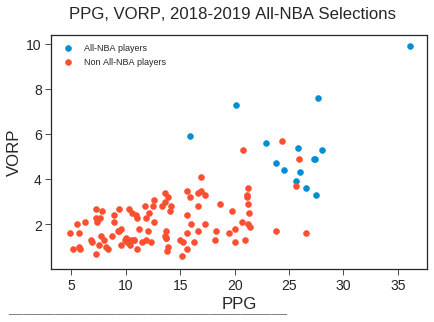

In [134]:
plt.style.use('seaborn-ticks')

ppg, ax = plt.subplots()

ax.scatter(all_nba['PTS'], all_nba['VORP'], label = "All-NBA players")
ax.scatter(non_all_nba['PTS'], non_all_nba['VORP'], label = "Non All-NBA players")

ax.legend(loc='best', prop={'size': 9})
ax.set_xlabel('PPG')
ax.set_ylabel('VORP')

ppg.suptitle("PPG, VORP, 2018-2019 All-NBA Selections")
ppg.text(x = -0.02, y= -0.08,
        s='____________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

ppg.savefig('Documents/AI_PROJECT/ppg_vs_vorp.png', dpi= 400, bbox_inches = 'tight')

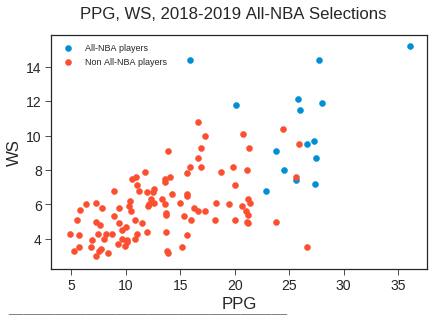

In [135]:
plt.style.use('seaborn-ticks')

ppg, ax = plt.subplots()

ax.scatter(all_nba['PTS'], all_nba['WS'], label = "All-NBA players")
ax.scatter(non_all_nba['PTS'], non_all_nba['WS'], label = "Non All-NBA players")

ax.legend(loc='best', prop={'size': 9})
ax.set_xlabel('PPG')
ax.set_ylabel('WS')

ppg.suptitle("PPG, WS, 2018-2019 All-NBA Selections")
ppg.text(x = -0.02, y= -0.08,
        s='____________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

ppg.savefig('Documents/AI_PROJECT/ppg_vs_ws.png', dpi= 400, bbox_inches = 'tight')

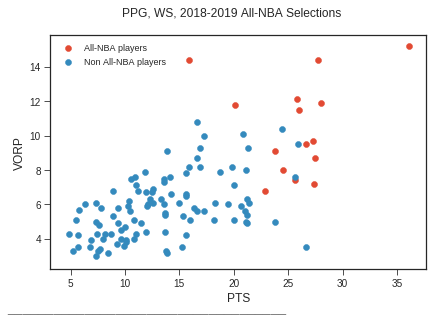

In [49]:
plt.style.use('seaborn-ticks')

ppg, ax = plt.subplots()

ax.scatter(all_nba['PTS'], all_nba['WS'], label = "All-NBA players")
ax.scatter(non_all_nba['PTS'], non_all_nba['WS'], label = "Non All-NBA players")

ax.legend(loc='best', prop={'size': 9})
ax.set_xlabel('PTS')
ax.set_ylabel('VORP')

ppg.suptitle("PPG, WS, 2018-2019 All-NBA Selections")
ppg.text(x = -0.02, y= -0.08,
        s='____________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

ppg.savefig('Documents/AI_PROJECT/ppg_vs_ws.png', dpi= 400, bbox_inches = 'tight')

In [64]:
all_NBA_1979_2018 = pd.read_csv('Documents/AI_PROJECT/ALL-NBA-1979-2018.csv')
non_all_NBA_1979_2018 = pd.read_csv('Documents/AI_PROJECT/Non-ALL-NBA-1979-2018.csv')

non_all_NBA_1979_2018.head()

,Rk,Player,Season,Age,Tm,Lg,WS,VORP,BPM,G,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,74,Kevin Garnett\garneke01,2005-06,29,MIN,NBA,14.9,7.4,7.9,76,...,1.4,2.4,2.7,21.8,0.526,0.532,0.267,0.529,0.810,0.589
1,101,Horace Grant\grantho01,1991-92,26,CHI,NBA,14.1,6.7,7.3,81,...,1.6,1.2,2.4,14.2,0.578,0.580,0.000,0.578,0.741,0.618
2,130,Elton Brand\brandel01,2001-02,22,LAC,NBA,13.6,6.2,6.2,80,...,2.0,2.2,3.2,18.2,0.527,0.527,NaN,0.527,0.742,0.586
3,135,Chauncey Billups\billuch01,2007-08,31,DET,NBA,13.5,5.2,6.1,78,...,0.2,2.1,1.7,17.0,0.448,0.479,0.401,0.526,0.918,0.619
4,146,James Harden\hardeja01,2015-16,26,HOU,NBA,13.3,6.9,6.7,82,...,0.6,4.6,2.8,29.0,0.439,0.494,0.359,0.512,0.860,0.598


In [67]:
all_NBA_1979_2018['ALL-NBA'] = 1
non_all_NBA_1979_2018['ALL-NBA'] = 0
ALL_PLAYERS = all_NBA_1979_2018.append(non_all_NBA_1979_2018)

In [71]:
all_NBA_79_18 = ALL_PLAYERS.loc[ALL_PLAYERS['ALL-NBA'] == 1]
non_all_nba_79_18 = ALL_PLAYERS.loc[ALL_PLAYERS['ALL-NBA'] == 0]

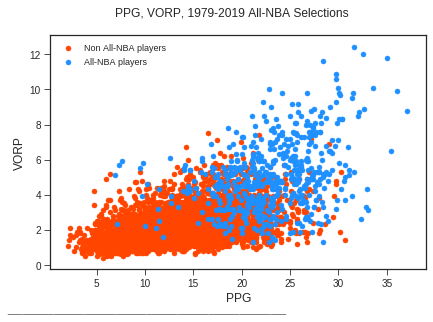

In [97]:
plt.style.use('seaborn-ticks')

ppg, ax = plt.subplots()

ax.scatter(non_all_nba_79_18['PTS'], non_all_nba_79_18['VORP'], label = "Non All-NBA players",s=25, c='orangered')
ax.scatter(all_NBA_79_18['PTS'], all_NBA_79_18['VORP'], label = "All-NBA players", s=25,c='dodgerblue')

ax.legend(loc='best', prop={'size': 9})
ax.set_xlabel('PPG')
ax.set_ylabel('VORP')

ppg.suptitle("PPG, VORP, 1979-2019 All-NBA Selections")
ppg.text(x = -0.02, y= -0.08,
        s='____________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

ppg.savefig('Documents/AI_PROJECT/ppg_vs_vorp_1979_2018.png', dpi= 600, bbox_inches = 'tight')

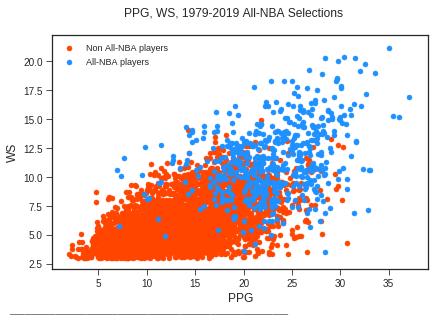

In [98]:
plt.style.use('seaborn-ticks')

ppg, ax = plt.subplots()

ax.scatter(non_all_nba_79_18['PTS'], non_all_nba_79_18['WS'], label = "Non All-NBA players",s=25,c='orangered')

ax.scatter(all_NBA_79_18['PTS'], all_NBA_79_18['WS'], label = "All-NBA players", s=25,c='dodgerblue')

ax.legend(loc='best', prop={'size': 9})
ax.set_xlabel('PPG')
ax.set_ylabel('WS')

ppg.suptitle("PPG, WS, 1979-2019 All-NBA Selections")
ppg.text(x = -0.02, y= -0.08,
        s='____________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

ppg.savefig('Documents/AI_PROJECT/ppg_vs_ws_1979_2018.png', dpi= 400, bbox_inches = 'tight')

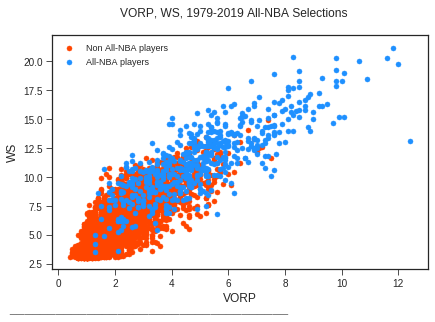

In [100]:
plt.style.use('seaborn-ticks')

ppg, ax = plt.subplots()

ax.scatter(non_all_nba_79_18['VORP'], non_all_nba_79_18['WS'], label = "Non All-NBA players",s=25,c='orangered')

ax.scatter(all_NBA_79_18['VORP'], all_NBA_79_18['WS'], label = "All-NBA players", s=25,c='dodgerblue')

ax.legend(loc='best', prop={'size': 9})
ax.set_xlabel('VORP')
ax.set_ylabel('WS')

ppg.suptitle("VORP, WS, 1979-2019 All-NBA Selections")
ppg.text(x = -0.02, y= -0.08,
        s='____________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

ppg.savefig('Documents/AI_PROJECT/VORP_vs_ws_1979_2018.png', dpi= 400, bbox_inches = 'tight')

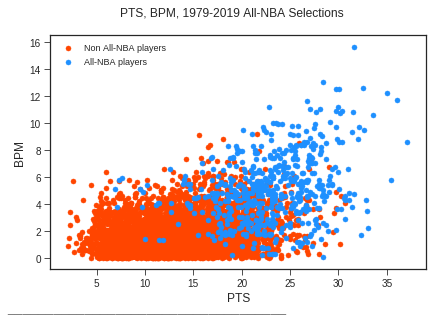

In [104]:
plt.style.use('seaborn-ticks')

ppg, ax = plt.subplots()

ax.scatter(non_all_nba_79_18['PTS'], non_all_nba_79_18['BPM'], label = "Non All-NBA players",s=25,c='orangered')

ax.scatter(all_NBA_79_18['PTS'], all_NBA_79_18['BPM'], label = "All-NBA players", s=25,c='dodgerblue')

ax.legend(loc='best', prop={'size': 9})
ax.set_xlabel('PTS')
ax.set_ylabel('BPM')

ppg.suptitle("PTS, BPM, 1979-2019 All-NBA Selections")
ppg.text(x = -0.02, y= -0.08,
        s='____________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')

ppg.savefig('Documents/AI_PROJECT/PTS_vs_BPM_1979_2018.png', dpi= 400, bbox_inches = 'tight')

In [323]:
train, test = train_test_split(ALL_PLAYERS, test_size = 0.05, random_state = 36)

xtrain = train[['PTS', 'TRB', 'AST', 'VORP', 'WS', 'BPM']]
ytrain = train[['ALL-NBA']]

xtest = test[['PTS', 'TRB', 'AST', 'VORP', 'WS', 'BPM']]
ytest = test[['ALL-NBA']]

print("Training set size: %.0f" % len(xtrain))
print("Testing set size: %.0f" % len(xtest))

Training set size: 4012
Testing set size: 212


In [324]:
def scores(model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Accuracy score: %.3f" % metrics.accuracy_score(ytest, y_pred))
    print("Recall: %.3f" % metrics.recall_score(ytest, y_pred))
    print("Precision: %.3f" % metrics.precision_score(ytest, y_pred))
    print("F1: %.3f" % metrics.f1_score(ytest, y_pred))
    
    proba = model.predict_proba(xtest)
    print("Log loss: %.3f" % metrics.log_loss(ytest, proba))

    pos_prob = proba[:, 1]
    print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytest, pos_prob))
    
    cv = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'accuracy')
    print("Accuracy (cross validation score): %0.3f (+/- %0.3f)" % (cv.mean(), cv.std() * 2))
    
    return y_pred

In [325]:
svc = SVC(kernel = 'rbf', gamma = 1e-3, C = 100, probability = True)
print('SVC Scores')
y_svc = scores(svc)

SVC Scores
Accuracy score: 0.958
Recall: 0.786
Precision: 0.880
F1: 0.830
Log loss: 0.116
Area under ROC curve: 0.980
Accuracy (cross validation score): 0.972 (+/- 0.001)


In [234]:
rf = RandomForestClassifier(random_state = 999, n_estimators = 100, criterion = 'gini')
print('RF Scores')
y_rf = scores(rf)

RF Scores
Accuracy score: 0.958
Recall: 0.714
Precision: 0.952
F1: 0.816
Log loss: 0.108
Area under ROC curve: 0.986
Accuracy (cross validation score): 0.915 (+/- 0.023)


In [235]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 12, weights = 'uniform')
print('kNN Scores')
y_knn = scores(knn)

kNN Scores
Accuracy score: 0.948
Recall: 0.607
Precision: 1.000
F1: 0.756
Log loss: 0.271
Area under ROC curve: 0.964
Accuracy (cross validation score): 0.915 (+/- 0.037)


In [236]:
dnn = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = 100, random_state = 999, activation = 'relu')
print('MLP Classifier')
y_dnn = scores(dnn)

MLP Classifier
Accuracy score: 0.948
Recall: 0.786
Precision: 0.815
F1: 0.800
Log loss: 0.139
Area under ROC curve: 0.969
Accuracy (cross validation score): 0.944 (+/- 0.040)


In [237]:
dtc =  DecisionTreeClassifier(max_depth=5)
print('DTC Scores')
y_dtc = scores(dtc)

DTC Scores
Accuracy score: 0.953
Recall: 0.714
Precision: 0.909
F1: 0.800
Log loss: 0.119
Area under ROC curve: 0.980
Accuracy (cross validation score): 0.920 (+/- 0.015)


In [292]:
def confusion_matrix(y_pred, model_name):
    cm = metrics.confusion_matrix(ytest, y_pred)

    plt.style.use("default")
    z, ax = plt.subplots()

    sns.heatmap(cm, annot=True, ax = ax, linewidth = 2, fmt='g',cmap="YlOrRd")

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    z.suptitle("%s Confusion Matrix" % model_name, weight = 'bold', size = 18, x = .45)

    z.savefig('Documents/AI_PROJECT/%s_cm.png' % model_name, dpi = 400, bbox_inches = 'tight')

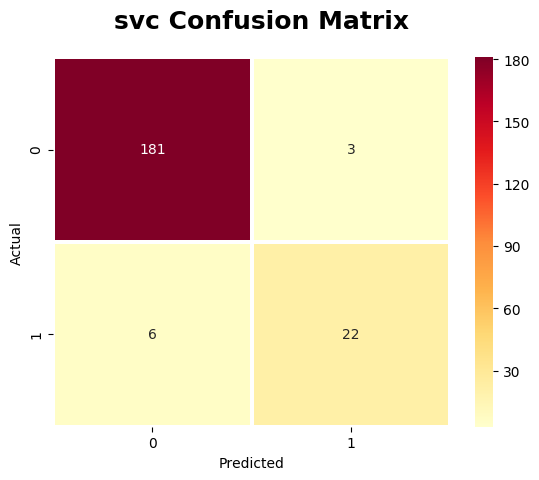

In [293]:
confusion_matrix(y_svc, 'svc')

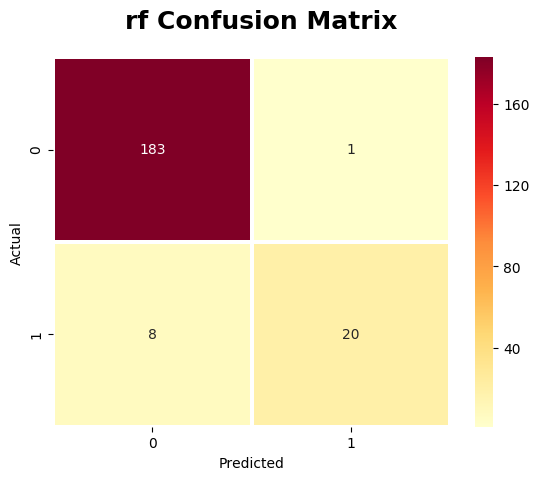

In [294]:
confusion_matrix(y_rf, 'rf')

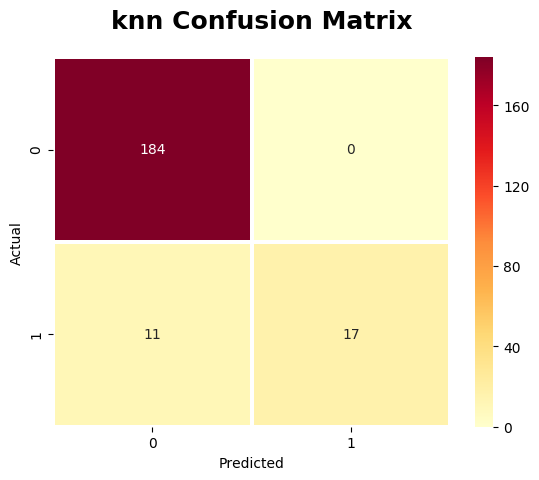

In [295]:
confusion_matrix(y_knn, 'knn')

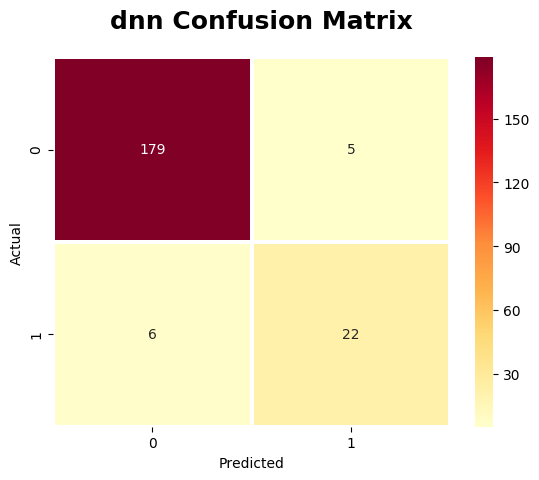

In [296]:
confusion_matrix(y_dnn, 'dnn')

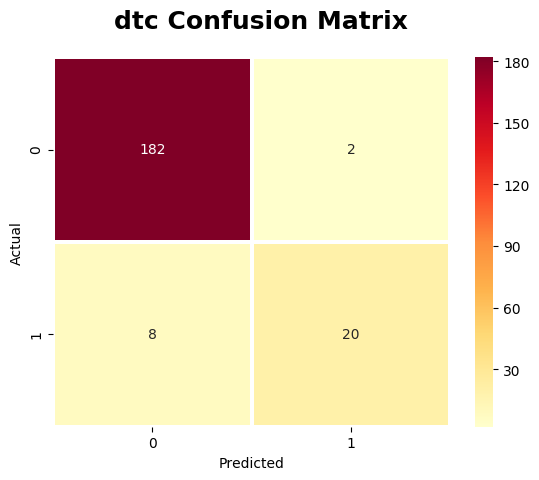

In [297]:
confusion_matrix(y_dtc, 'dtc')

In [244]:
dfCurrentNames = ALLOF.iloc[:, 1]
testpredict = ALLOF[['PTS', 'TRB', 'AST', 'VORP', 'WS', 'BPM', 'G']]

ALLOF.head()

,Rk,Player,Season,Age,Tm,Lg,WS,VORP,BPM,G,...,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%,ALL-NBA
0,1,James Harden\hardeja01,2018-19,29,HOU,NBA,15.2,9.9,11.7,78,...,5.0,3.1,36.1,0.442,0.528,0.368,0.541,0.879,0.616,1
1,2,Giannis Antetokounmpo\antetgi01,2018-19,24,MIL,NBA,14.4,7.6,10.8,72,...,3.7,3.2,27.7,0.578,0.641,0.256,0.599,0.729,0.644,1
2,3,Rudy Gobert\goberru01,2018-19,26,UTA,NBA,14.4,5.9,7.0,81,...,1.6,2.9,15.9,0.669,0.669,NaN,0.669,0.636,0.682,1
3,4,Damian Lillard\lillada01,2018-19,28,POR,NBA,12.1,5.4,5.5,80,...,2.7,1.9,25.8,0.444,0.499,0.369,0.522,0.912,0.588,1
4,5,Paul George\georgpa01,2018-19,28,OKC,NBA,11.9,5.3,5.5,77,...,2.7,2.8,28.0,0.438,0.484,0.386,0.529,0.839,0.583,1


In [307]:
def make_pred(model):

    proba = model.predict_proba(testpredict)
    pos_prob = proba[:, 1]
    
    combined_list = [[i, j] for i, j in zip(dfCurrentNames, pos_prob)]
    combined_list = sorted(combined_list, key = itemgetter(1), reverse = True)
    
    for i in combined_list:
        print(i)
        
    return pos_prob


In [308]:
svc_prob = make_pred(svc)

['James Harden\\hardeja01', 0.999999925517939]
['Giannis Antetokounmpo\\antetgi01', 0.9999994972087097]
['Joel Embiid\\embiijo01', 0.9863005597158346]
['Paul George\\georgpa01', 0.9709166521287745]
['Nikola Jokić\\jokicni01', 0.9680484192473774]
['Anthony Davis\\davisan02', 0.9674384418476252]
['Damian Lillard\\lillada01', 0.9527755752046231]
['Rudy Gobert\\goberru01', 0.9375408970308351]
['Karl-Anthony Towns\\townska01', 0.9322881183883422]
['Kevin Durant\\duranke01', 0.9290420854599598]
['Stephen Curry\\curryst01', 0.8875705105356791]
['LeBron James\\jamesle01', 0.8536338774226472]
['Russell Westbrook\\westbru01', 0.843973280205862]
['Kawhi Leonard\\leonaka01', 0.8366251955156799]
['Nikola Vučević\\vucevni01', 0.7078624822886264]
['Kyrie Irving\\irvinky01', 0.6420767716982124]
['Blake Griffin\\griffbl01', 0.5320474846845713]
['Andre Drummond\\drumman01', 0.3760110219664676]
['Clint Capela\\capelca01', 0.2818547200417608]
['Kemba Walker\\walkeke02', 0.21319666093306658]
['Bradley Beal

In [247]:
rf_prob = make_pred(rf)

['James Harden\\hardeja01', 1.0]
['Giannis Antetokounmpo\\antetgi01', 1.0]
['Damian Lillard\\lillada01', 0.97]
['Paul George\\georgpa01', 0.96]
['Nikola Jokić\\jokicni01', 0.96]
['Stephen Curry\\curryst01', 0.95]
['Kawhi Leonard\\leonaka01', 0.94]
['Kyrie Irving\\irvinky01', 0.92]
['Russell Westbrook\\westbru01', 0.9]
['Rudy Gobert\\goberru01', 0.89]
['LeBron James\\jamesle01', 0.89]
['Kevin Durant\\duranke01', 0.88]
['Joel Embiid\\embiijo01', 0.88]
['Blake Griffin\\griffbl01', 0.86]
['Kemba Walker\\walkeke02', 0.69]
['Karl-Anthony Towns\\townska01', 0.34]
['Bradley Beal\\bealbr01', 0.3]
['Anthony Davis\\davisan02', 0.27]
['Nikola Vučević\\vucevni01', 0.24]
['Clint Capela\\capelca01', 0.18]
['Luka Dončić\\doncilu01', 0.1]
['Andre Drummond\\drumman01', 0.09]
['Mike Conley\\conlemi01', 0.06]
['LaMarcus Aldridge\\aldrila01', 0.05]
['Ben Simmons\\simmobe01', 0.04]
['Jrue Holiday\\holidjr01', 0.04]
["D'Angelo Russell\\russeda01", 0.04]
['Devin Booker\\bookede01', 0.04]
['Pascal Siakam\\siak

In [250]:
knn_prob = make_pred(knn)

['James Harden\\hardeja01', 1.0]
['Giannis Antetokounmpo\\antetgi01', 1.0]
['Damian Lillard\\lillada01', 1.0]
['Nikola Jokić\\jokicni01', 0.9166666666666666]
['Stephen Curry\\curryst01', 0.9166666666666666]
['Joel Embiid\\embiijo01', 0.9166666666666666]
['Anthony Davis\\davisan02', 0.9166666666666666]
['Kevin Durant\\duranke01', 0.8333333333333334]
['Paul George\\georgpa01', 0.75]
['Kyrie Irving\\irvinky01', 0.75]
['Karl-Anthony Towns\\townska01', 0.75]
['Nikola Vučević\\vucevni01', 0.75]
['Rudy Gobert\\goberru01', 0.6666666666666666]
['LeBron James\\jamesle01', 0.6666666666666666]
['Russell Westbrook\\westbru01', 0.5]
['Blake Griffin\\griffbl01', 0.4166666666666667]
['Kemba Walker\\walkeke02', 0.4166666666666667]
['Andre Drummond\\drumman01', 0.4166666666666667]
['Devin Booker\\bookede01', 0.4166666666666667]
['Kawhi Leonard\\leonaka01', 0.3333333333333333]
['Clint Capela\\capelca01', 0.25]
['Mike Conley\\conlemi01', 0.25]
['Bradley Beal\\bealbr01', 0.25]
['Jrue Holiday\\holidjr01', 0

In [252]:
dnn_prob = make_pred(dnn)

['James Harden\\hardeja01', 0.9978325062702574]
['Giannis Antetokounmpo\\antetgi01', 0.9700134585380277]
['Paul George\\georgpa01', 0.905408881266453]
['Damian Lillard\\lillada01', 0.8753830514086717]
['Rudy Gobert\\goberru01', 0.825931591264649]
['Kevin Durant\\duranke01', 0.8258779273169143]
['Joel Embiid\\embiijo01', 0.7250943389394829]
['Kawhi Leonard\\leonaka01', 0.7248047795117921]
['Nikola Jokić\\jokicni01', 0.7125148777114573]
['Stephen Curry\\curryst01', 0.7004812904229653]
['Clint Capela\\capelca01', 0.667675086769144]
['Karl-Anthony Towns\\townska01', 0.5621095253099804]
['Russell Westbrook\\westbru01', 0.5538633384086111]
['LeBron James\\jamesle01', 0.5487134140787792]
['Anthony Davis\\davisan02', 0.5343367040751774]
['Kyrie Irving\\irvinky01', 0.5238745844501579]
['Andre Drummond\\drumman01', 0.4993449471505758]
['Blake Griffin\\griffbl01', 0.3452601414196772]
['Nikola Vučević\\vucevni01', 0.3263581830235899]
['Mike Conley\\conlemi01', 0.23692987235351531]
['Bradley Beal\\

In [253]:
dtc_prob = make_pred(dtc)

['James Harden\\hardeja01', 0.9863013698630136]
['Giannis Antetokounmpo\\antetgi01', 0.9863013698630136]
['Damian Lillard\\lillada01', 0.9863013698630136]
['Paul George\\georgpa01', 0.9863013698630136]
['Kevin Durant\\duranke01', 0.8421052631578947]
['Stephen Curry\\curryst01', 0.813953488372093]
['Kawhi Leonard\\leonaka01', 0.813953488372093]
['Kyrie Irving\\irvinky01', 0.813953488372093]
['Blake Griffin\\griffbl01', 0.813953488372093]
['LeBron James\\jamesle01', 0.813953488372093]
['Russell Westbrook\\westbru01', 0.813953488372093]
['Joel Embiid\\embiijo01', 0.7333333333333333]
['Nikola Jokić\\jokicni01', 0.7313432835820896]
['Clint Capela\\capelca01', 0.4642857142857143]
['Karl-Anthony Towns\\townska01', 0.4444444444444444]
['Anthony Davis\\davisan02', 0.4444444444444444]
['Rudy Gobert\\goberru01', 0.38095238095238093]
['Kemba Walker\\walkeke02', 0.36904761904761907]
['Mike Conley\\conlemi01', 0.36904761904761907]
['Bradley Beal\\bealbr01', 0.36904761904761907]
["D'Angelo Russell\\r

In [255]:
avg_prob = []

for i, j, k, l, m in zip(svc_prob, rf_prob, knn_prob, dnn_prob,dtc_prob ):
    avg_prob.append((i + j + k + l + m) / 5)
    
avg_list = [[i, j] for i, j in zip(dfCurrentNames, avg_prob)]
avg_list = sorted(avg_list, key = itemgetter(1), reverse = True)

for i in avg_list:
    print(i)


['James Harden\\hardeja01', 0.9968267603302421]
['Giannis Antetokounmpo\\antetgi01', 0.9912628651219503]
['Damian Lillard\\lillada01', 0.9568919992952617]
['Paul George\\georgpa01', 0.9145253806516482]
['Kevin Durant\\duranke01', 0.8620717218536205]
['Nikola Jokić\\jokicni01', 0.8577146494415182]
['Stephen Curry\\curryst01', 0.8537343911994807]
['Joel Embiid\\embiijo01', 0.8482789797310636]
['LeBron James\\jamesle01', 0.7545934893080373]
['Rudy Gobert\\goberru01', 0.7402183071829064]
['Kyrie Irving\\irvinky01', 0.7299809689040926]
['Kawhi Leonard\\leonaka01', 0.7297433593465797]
['Russell Westbrook\\westbru01', 0.7223580213973133]
['Anthony Davis\\davisan02', 0.6265772514067827]
['Karl-Anthony Towns\\townska01', 0.6057684176285534]
['Blake Griffin\\griffbl01', 0.5935855562286017]
['Nikola Vučević\\vucevni01', 0.44111356311425676]
['Kemba Walker\\walkeke02', 0.37497088326213274]
['Clint Capela\\capelca01', 0.3687631042193239]
['Andre Drummond\\drumman01', 0.31267395720855545]
['Bradley 

In [329]:
all_NBA_2019_2020 = pd.read_csv('Documents/AI_PROJECT/NBA-PLAYERS-2019-2020.csv')
ALL_NBA_NAMES = all_NBA_2019_2020.iloc[:, 1]
testpredict2020 = all_NBA_2019_2020[['PTS', 'TRB', 'AST', 'VORP', 'WS', 'BPM']]


In [330]:
def make_pred2020(model):

    proba = model.predict_proba(testpredict2020)
    pos_prob = proba[:, 1]
    
    combined_list = [[i, j] for i, j in zip(ALL_NBA_NAMES, pos_prob)]
    combined_list = sorted(combined_list, key = itemgetter(1), reverse = True)
    
    for i in combined_list:
        print(i)
        
    return pos_prob

In [331]:
svc_prob2020 = make_pred2020(svc) 

['James Harden\\hardeja01', 0.9956464603833086]
['Giannis Antetokounmpo\\antetgi01', 0.9923678216910263]
['Luka Dončić\\doncilu01', 0.975751555432221]
['Karl-Anthony Towns\\townska01', 0.8345737853011568]
['Anthony Davis\\davisan02', 0.5632282182972866]
['LeBron James\\jamesle01', 0.5300974950413972]
['Joel Embiid\\embiijo01', 0.4416940978095661]
['Andre Drummond\\drumman01', 0.3997598877569715]
['Damian Lillard\\lillada01', 0.26115153898566096]
['Kyrie Irving\\irvinky01', 0.23484855033447968]
['Clint Capela\\capelca01', 0.21579016974569504]
['Pascal Siakam\\siakapa01', 0.21573742302586305]
['Kawhi Leonard\\leonaka01', 0.20326715873399986]
['Duncan Robinson\\robindu01', 0.18870270061875052]
['Domantas Sabonis\\sabondo01', 0.18407940349099963]
['Brandon Ingram\\ingrabr01', 0.18326914512286938]
['Ersan İlyasova\\ilyaser01', 0.17443607503389474]
['Rudy Gobert\\goberru01', 0.16983313482702714]
['Chris Boucher\\bouchch01', 0.16625164063969028]
['James Ennis\\ennisja01', 0.16375568695643866]